# Visualize output
    -Author: GEOframe group
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
-----


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
%matplotlib inline

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

plt.rcParams.update(nice_fonts)
#setta parametri come default


In [3]:
# si può specificare una mappa di colori definiti in modo discreto
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b'])
os.chdir(os.path.join(os.getcwd(), "..", "output"))
#sito: colorbrewer 2.0
os.getcwd()

'C:\\Users\\emmat\\Desktop\\Progetto idrologia\\OMS_WHETGEO1D\\output'

https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

## Read the output file

In [4]:
ds = xr.open_dataset("emma_0000.nc")
ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.99 -1.97 -1.95 ... -0.05 -0.03 -0.01
  * dualDepth         (dualDepth) float64 -2.0 -1.98 -1.96 ... -0.06 -0.04 -0.02
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:  

In [5]:
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.99 -1.97 -1.95 ... -0.05 -0.03 -0.01
  * dualDepth         (dualDepth) float64 -2.0 -1.98 -1.96 ... -0.06 -0.04 -0.02
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:             Top Dirichlet
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\emmat\Desktop\OMS_WHETGEO1D/...
    path_bottom_boundary_condition:     C:\Users\emmat\Desktop\OMS_WHETGEO1D/...
    path_grid:                          C:\Users\emmat\Desktop\OMS_WHETGEO1D/...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

## 2D plot

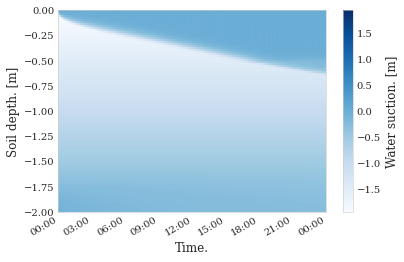

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6,6/1.618))

ds.psi.plot(ax=ax, y='depth', cmap='Blues')

# ax.set_title('text')
# ax.set_ylabel('text')
# ax.set_xlabel('text')


# Si possono migliorare le etichette dell'asse delle x con:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) #data nel formato ora minuti
# ax.xaxis.set_tick_params(rotation=45)

plt.show()

in automatico la seconda stringa restituisce già il nome delle coordinate e le UdM, grazie a ax

## 1D plot

### Vertical profile

In [7]:
ds.time.values

array(['2020-01-01T00:00:00.000000000', '2020-01-01T00:01:00.000000000',
       '2020-01-01T00:02:00.000000000', ...,
       '2020-01-01T23:58:00.000000000', '2020-01-01T23:59:00.000000000',
       '2020-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

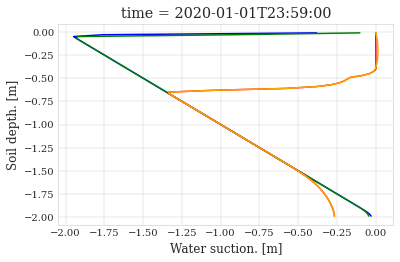

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6,6/1.618))

ds.psi.sel(time='2020-01-01T00:00:00.000000000').plot(ax=ax, y='depth', color='blue')
ds.psi.sel(time='2020-01-01T00:02:00.000000000').plot(ax=ax, y='depth', color='green')
ds.psi.sel(time='2020-01-01T23:58:00.000000000').plot(ax=ax, y='depth', color='red')
ds.psi.sel(time='2020-01-01T23:59:00.000000000').plot(ax=ax, y='depth', color='orange')

#ds.psi.sel(time=slice('2020-01-01T00:00:00.000000000','2020-01-01T00:00:00.000000000')).plot(ax=ax, y='depth', color='green')


#ax.set_title('Suzione')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

plt.show()

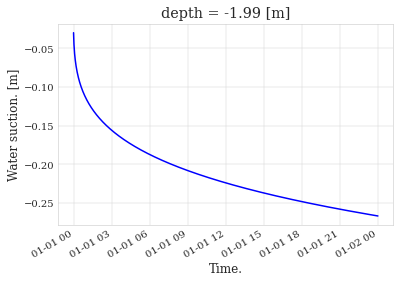

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6,6/1.618))

#scegliere una data profondità e valutare la variabile
#la funzione sel ritorna il v di controlo più vicino alla coordinata depth
ds.psi.sel(depth=-2.9, method='nearest').plot(ax=ax, color='blue')


### Time evolution at a specific depth

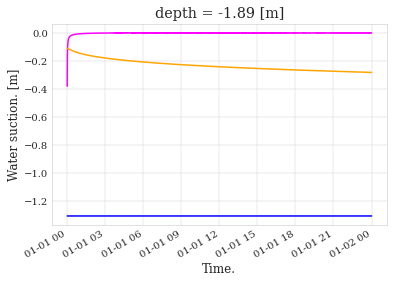

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,6/1.618))

ds.psi.sel(depth=-0.7, method='nearest').plot(ax=ax, color='blue')
ds.psi.sel(depth=-0.01, method='nearest').plot(ax=ax, color='magenta')
ds.psi.sel(depth=-1.90, method='nearest').plot(ax=ax, color='orange')



# ax.set_title('text')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)

plt.show()

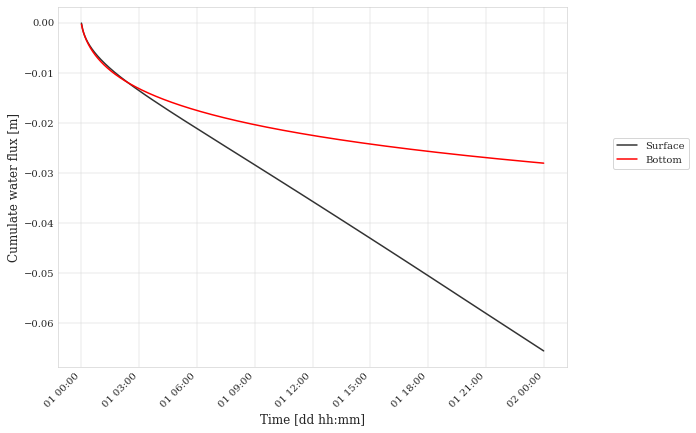

In [11]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 
#graficare le velocità: i flussi di Darcy
(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')
#i nomi delle variabili si leggono dalla tabella ds
#coordinatta Depth = posizione centroidi
#dualDepth= posizione relativa

ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()